In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [4]:
json_path="./data/implementations.json"
with open(json_path) as f:
    data = json.load(f)

In [22]:
mandelbrot32 = []
mandelbrot64 = []
simd32 = []
simd64 = []

for d in data["datapoints"]:
    avg_time = np.asarray(list(map(lambda x: x["computationTime"],
                   d["data"]["workers"])))
    avg_time=[np.average(avg_time)]
    if d["implementation"] == "mandelbrot32":
        mandelbrot32.extend(avg_time)
    elif d["implementation"] == "mandelbrot64":
        mandelbrot64.extend(avg_time)
    elif d["implementation"] == "mandelbrotsimd32":
        simd32.extend(avg_time)
    elif d["implementation"] == "mandelbrotsimd64":
        simd64.extend(avg_time)

# time in ms
mandelbrot32 = np.asarray(mandelbrot32)
mandelbrot64 = np.asarray(mandelbrot64)
simd32 = np.asarray(simd32)
simd64 = np.asarray(simd64)
print(mandelbrot32, mandelbrot64, simd32, simd64)


[ 309031.72222222  167608.08333333  109320.25       2672176.25
  293862.22222222  714481.97222222  313455.72222222  309540.27777778] [ 312330.83333333  168728.5         110207.88888889 2691159.38888889
  294952.19444444  718178.97222222  314985.69444444  311167.        ] [ 156828.94444444  101843.86111111   76982.58333333 1080278.25
  164491.77777778  319324.61111111  159922.94444444  156680.11111111] [ 257975.30555556  146771.05555556   99029.88888889 2101535.52777778
  254026.97222222  577668.58333333  261247.38888889  257794.22222222]


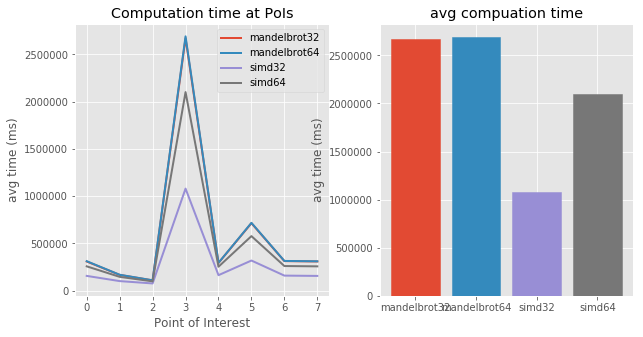

In [23]:
# Data for plotting
x = np.arange(len(simd64))
names = ["mandelbrot32", "mandelbrot64", "simd32", "simd64"]

plt.style.use('ggplot')
fig, (line, bar) = plt.subplots(1, 2, figsize=(10,5))
p0 = line.plot(x, mandelbrot32, label=names[0], lw=2)
p1 = line.plot(x, mandelbrot64, label=names[1], lw=2)
p2 = line.plot(x, simd32, label=names[2], lw=2)
p3 = line.plot(x, simd64, label=names[3], lw=2)
line.legend()

line.set(xlabel='Point of Interest', ylabel='avg time (ms)',
       title='Computation time at PoIs')
line.grid(True)

avg = np.asarray([np.max(mandelbrot32), np.max(mandelbrot64), np.max(simd32), np.max(simd64)])
x_avg = np.arange(len(avg))

barlist = bar.bar(x_avg, avg)
# set colors of bars to match colors in line plot
barlist[0].set_color(p0[0].get_color())
barlist[1].set_color(p1[0].get_color())
barlist[2].set_color(p2[0].get_color())
barlist[3].set_color(p3[0].get_color())

bar.set_xticks(x_avg)
bar.set_xticklabels(names)
bar.set(ylabel="avg time (ms)",
       title="avg compuation time")
bar.grid(True)

# fig.savefig("impl_test.svg", format="svg")
plt.show()

2.473599972969927
(1.4200647116068463, 1.6457357518139832, 1.7864857817952402, 1.9705018312591818, 1.9756194681165655, 1.960042214774963, 2.2374785636977212, 2.473599972969927)


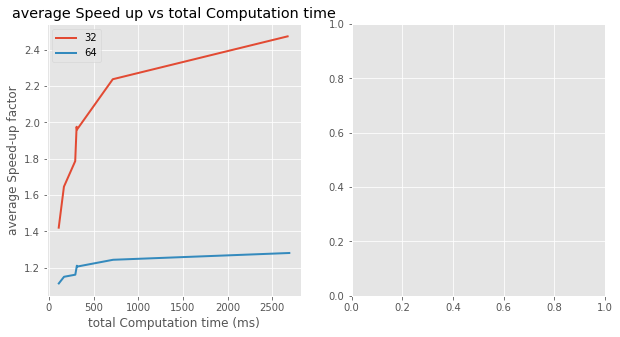

In [31]:
# Plot speed up versus computation time
speedup32 = mandelbrot32/simd32
speedup64 = mandelbrot64/simd64
print(max(speedup32))
m32, s32 = zip(*sorted(zip(mandelbrot32, speedup32), key=lambda x: x[0]))
print(s32)
m64, s64 = zip(*sorted(zip(mandelbrot64, speedup64), key=lambda x: x[0]))

plt.style.use('ggplot')
fig, (line, bar) = plt.subplots(1, 2, figsize=(10,5))
p0 = line.plot(np.asarray(m32)/1000, np.asarray(s32), label='32', lw=2)
p1 = line.plot(np.asarray(m64)/1000, np.asarray(s64), label='64', lw=2)
line.legend()

line.set(xlabel='total Computation time (ms)', ylabel='average Speed-up factor',
       title='average Speed up vs total Computation time')
line.grid(True)

fig.savefig("speedupvscomptime.svg", format="svg")
fig.savefig("speedupvscomptime.png", format="png")
plt.show()